## Distinguishing Spam and Nonspam Emails Using Unsupervised Learning Algorithms
#### Summary:
    - The objective of this task is to analyze the Spambase dataset and distinguish between spam and non-spam emails using unsupervised learning techniques. 
#### Data:
    - The dataset contains frequency of certain words used in an email, percentage of a certain character that is included in an email, and average, sum and lenght of uninterrupted capital letters used. The data does contain a target variable, which will be ommited from the data due to the use of unsupervised learning. However, target variable will be used to calculate ARI score and will be compared to Silhoutte score. The data was collected using reported spam emails by individuals and non-spam emails came from reported personal emails. The data can be accessed from kaggle by accessing the link: https://www.kaggle.com/somesh24/spambase
#### Methods: 
    - The analysis begins by understanding the variables, their data types, and if any missing values are present. Data is cleaned, processed, and analyzed using descriptive statistics and visualizations. Target variable is deleted to treat this task as an unsupervised learning. Variables are scaled and features are selected using PCA based on 95% data conservation. Scaled data will be applied to KMeans clustering algorithm to find optimum number of clusters using the elbow method and Silhouette Coefficient. Two reduced data's, from PCA and UMAP, will be applied to both KMeans and Hierarchical clustering algorithms. Total of 5 models is present. Models will be evaluated based on how well clusters are seperated visually, their Silhouette Coefficient, and ARI score.


### Exploratory Data Analysis

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

#To calculate RI, AIR, and Silhouette Scores
from sklearn import metrics

In [2]:
#Read and Load the Spambase dataset
data=pd.read_csv("spambase.csv")

In [3]:
#Get information about the data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Data is compomised of all numerical values. The value class denotes if an email is spam or not smap, represented by 1 and 0, respectively. 

In [4]:
#Lets double check if there are any null values
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Data does not have any missing values. 

In [5]:
#Check the size of the data we will be working on
data.shape

(4601, 58)

Data contains 4601 rows and 58 variables.

In [6]:
#Lets get statistics of the data
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Based on the large values shown by the last few variables, this dataset needs to be scaled to apply clustering algorithms, which we will do later on.

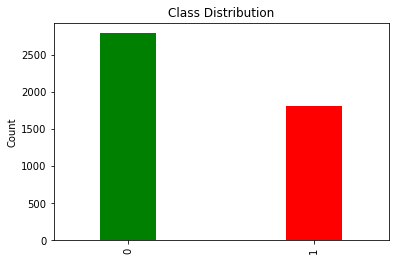

Number of non-spam emails:  2788
Number of spam emails:  1813
Percentage of spam emails in the data: 39.4 %


In [7]:
#Lets analyze our target variable
data['class'].value_counts().plot.bar(color=['green','red'], width=0.3)
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

print("Number of non-spam emails: ",len(data[data['class']==0]))
print("Number of spam emails: ",len(data[data['class']==1]))

print("Percentage of spam emails in the data:", str(round(100*len(data[data['class']==1])/len(data),2)),"%")

Number of spam emails only account for 39.4% of the whole data. We will compare this to our predicted values using ARI calculation.

In [8]:
#Drop the target variable
X=data.drop(columns=['class'], axis=1)
true_label=data['class'] #save true labels for later comparison

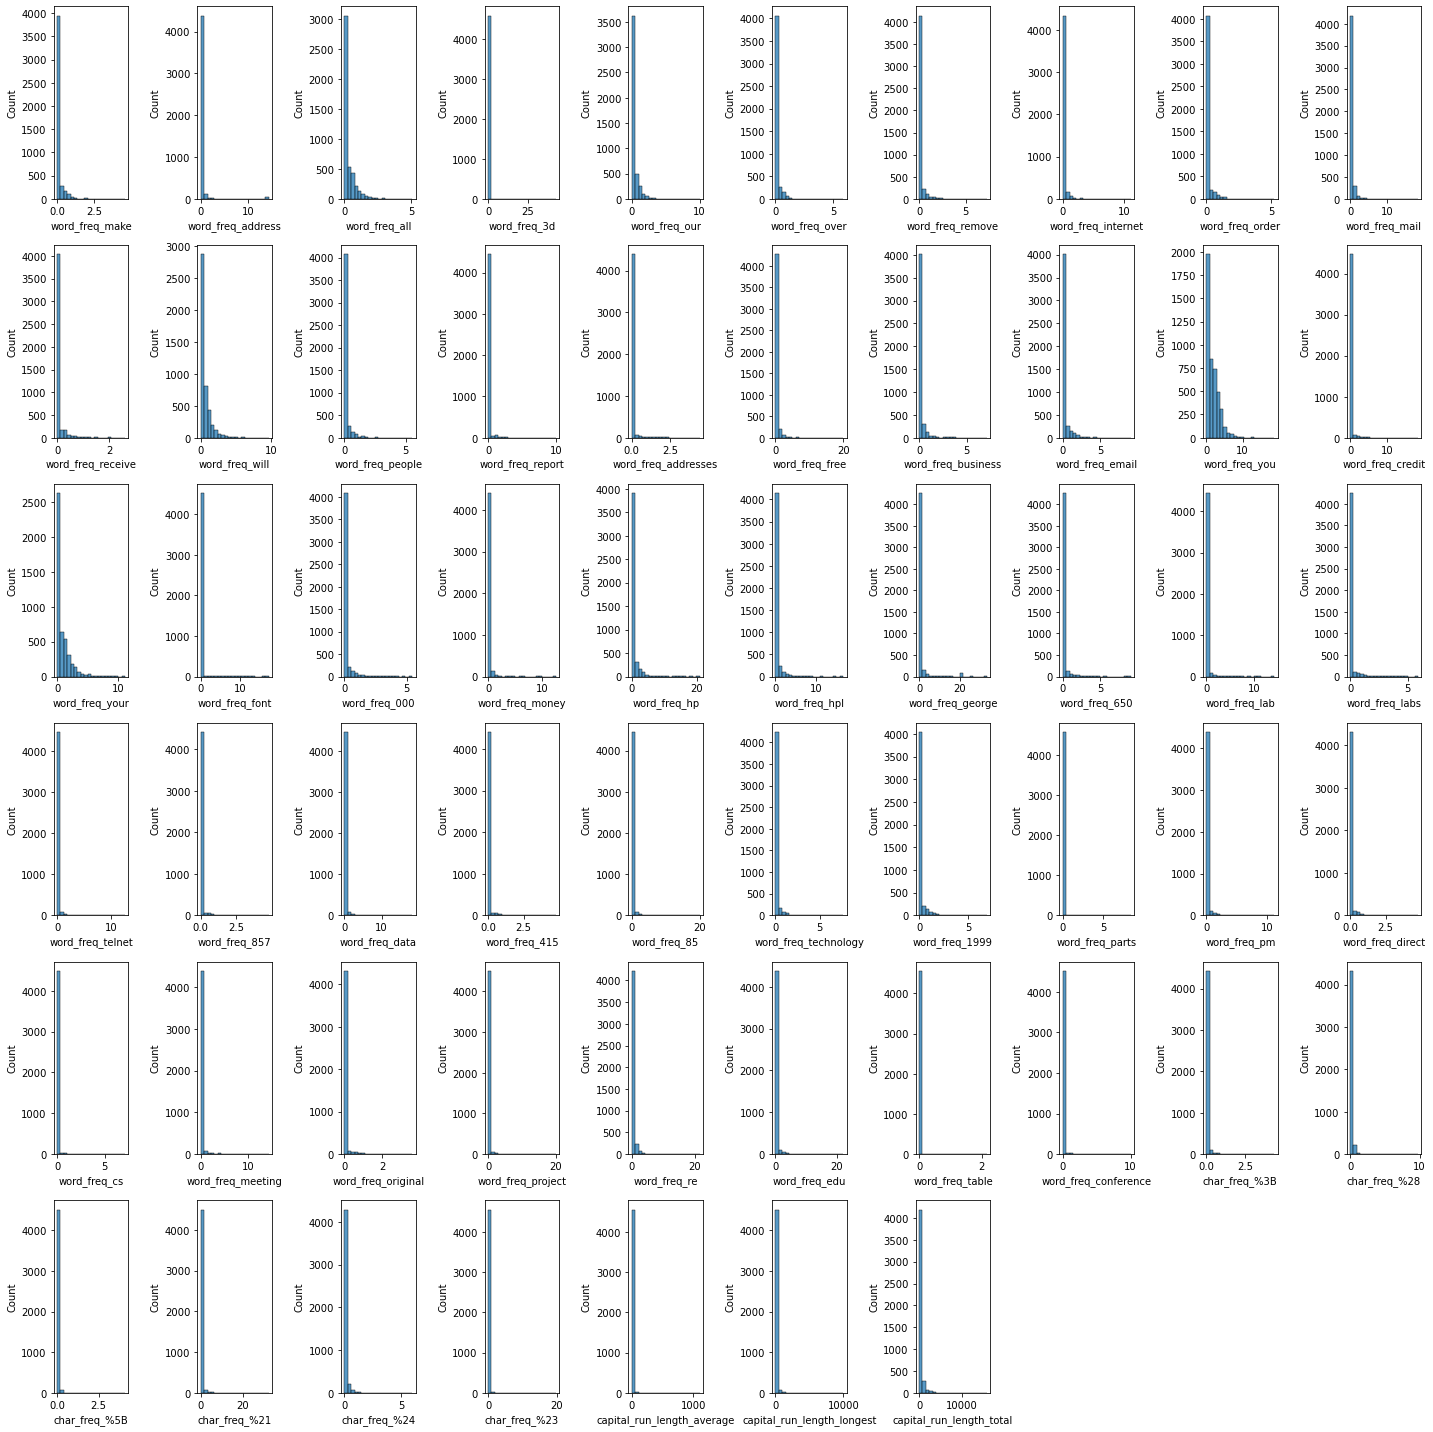

In [9]:
# Visualize the distribution of each variable
a=1
plt.figure(figsize=(20,20))
for col in list(X.columns):
    plt.subplot(6,round(len(X.columns)/6), a)
    sns.histplot(data=X, x=col, bins=20)
    a=a+1
plt.tight_layout()

In [10]:
#Analyzing highest 5 used words
X.sum().sort_values(ascending=False).iloc[3:8]

word_freq_you       7647.32
word_freq_your      3725.71
word_freq_george    3530.37
word_freq_hp        2528.27
word_freq_will      2492.37
dtype: float64

Based on the frequency distributions, amount of used words on each email sent were "you, your, george, hp, will".

Because we are trying to seperate emails in to spam and not spam category, we assume that two cluster need to be established. However, we will still test to see how many clusters we can make. 

In [11]:
b=data.groupby("class").sum().T.sort_values(by=[1],ascending=False).iloc[3:8]
b

class,0,1
word_freq_you,3541.71,4105.61
word_freq_your,1223.10,2502.61
word_freq_will,1495.27,997.10
word_freq_free,205.16,939.79
word_freq_our,504.74,931.80


In [12]:
zero=b[0].values
one=b[1].values

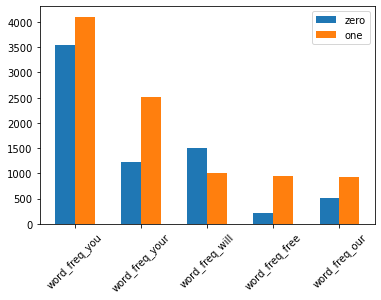

In [13]:
#Bivariate Analysis of spam and nonspam emails based on frequency of words used
plt.bar(np.arange(len(zero)),zero, width=0.3, label='zero')
plt.bar(np.arange(len(zero))+0.3,one, width=0.3, label='one')
plt.xticks(np.arange(5)+0.15, b.index, rotation=45)
plt.legend()
plt.show()

The graph above shows the use of words "you, your, free, and our", favors more a spam email than nonspam.

In [14]:
#Looking at first 10 highest correlated variables
corr_mat=X.corr()
for x in range(len(X.columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat.abs().idxmax().head(10)

word_freq_make                  word_freq_your
word_freq_address                word_freq_you
word_freq_all                   word_freq_your
word_freq_3d                   word_freq_money
word_freq_our                 word_freq_remove
word_freq_over                   word_freq_000
word_freq_remove            word_freq_business
word_freq_internet          word_freq_business
word_freq_order       capital_run_length_total
word_freq_mail             word_freq_addresses
dtype: object

In [15]:
#Prepocessing: Scale the data due to sensitivity of clustering algorithms to distance.
scaled=StandardScaler()
X_scaled=scaled.fit_transform(X)

#PCA Data to capture linear relationship between variables
pca=PCA(n_components=0.95, random_state=56) 
pca_data=pca.fit_transform(X_scaled)

pca.n_components_

48

48 components needed to conserve 95% of the variance from the original data. Will use this value for UMAP dimensionality reduction to compare to PCA data.

In [16]:
#UMAP Data to capture non-linear relationship between variables
umap_data = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      n_components=48,
                      metric='correlation',
                      random_state=56).fit_transform(X_scaled)

In [17]:
#Functions to Evaluate Clusters for KMeans

def display_cluster(data, model, num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    for i in range(num_clusters):
        plt.scatter(data[model.labels_==i,0],data[model.labels_==i,1],c = color[i],alpha = alpha,s=s)
        plt.scatter(model.cluster_centers_[i][0],model.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [18]:
#Function to calcualte Silhouette and ARI scores.

Silhouette_Scores=pd.DataFrame() #DataFrames to hold scores for each model.
ARI_Scores=pd.DataFrame()

def scores(data, model, true, model_name):
    sil_score=metrics.silhouette_score(data, model.labels_, metric='euclidean')
    ari_score=metrics.adjusted_rand_score(true_label, model.labels_)
    Silhouette_Scores[model_name]=[sil_score]
    ARI_Scores[model_name]=[ari_score]
    print(model_name," Silhouette Score:",sil_score)
    print(model_name," ARI Score:",ari_score)

In [19]:
#Model Functions
def kmeans(data, n_clusters): #Function to compute KMeans
    kmeans=KMeans(n_clusters=n_clusters, random_state=44)
    kmeans.fit(data)
    print(pd.DataFrame(kmeans.labels_).value_counts())
    return kmeans

def hierarchical(data,n_clusters, linkage): #Function to compute Hierarchical 
    agg_cluster=AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agg_cluster.fit(data)
    print(pd.DataFrame(agg_cluster.labels_).value_counts())
    return agg_cluster

## Modeling

### Model 1 to Evaluate a basic KMeans Model and to Identify Optimum Number of Clusters
Preliminary model uses KMeans algorithms set to 2 clusters with scaled data.

In [20]:
#Call Kmeans
kmeans_mod1=kmeans(X_scaled, 2)

1    4567
0      34
dtype: int64


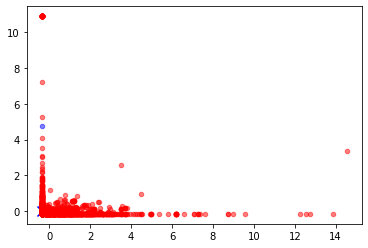

In [21]:
#Visualizing clusters
display_cluster(X_scaled, kmeans_mod1,2)

In [22]:
scores(X_scaled, kmeans_mod1, true_label, "Model 1")

Model 1  Silhouette Score: 0.6596309439335789
Model 1  ARI Score: -0.00494969888751088


Silhouette score is high but ARI is very low. Visual display of clusters is not well.

In [23]:
#Calculate the most optimum number of clusters KMeans can distinguish using the elbow method.
number_k=range(2,10)
inertia=[]
for i in number_k:
    km=KMeans(n_clusters=i, random_state=44)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

In [24]:
#Output inertia values
inertia

[242529.06593809626,
 231547.9628900354,
 224048.03979349672,
 219054.91074834525,
 214289.4905354405,
 210418.38874181046,
 205922.34407846804,
 201256.086774891]

Text(0.5, 0, 'K Values')

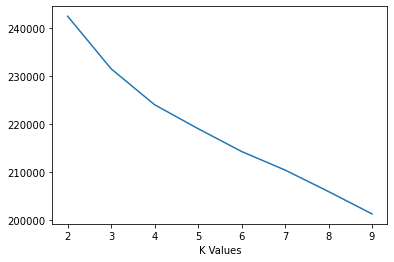

In [25]:
#Using the elbow method
plt.plot(number_k,inertia)
plt.xlabel('K Values')

The elbow method is not clear about the optimum k value to use. Therefore, silhouette score is used.

In [26]:
#Find the k-value using KMeans algorithm trained on scaled data
sil_score=[]
ari_score=[]
clusters=[]
for i in range(2,11):
    km=KMeans(n_clusters=i, random_state=44).fit(X_scaled)
    score=metrics.silhouette_score(X_scaled, km.labels_, metric='euclidean')
    ar_score=metrics.adjusted_rand_score(true_label, km.labels_)
    clusters.append(i)
    sil_score.append(score)
    ari_score.append(ar_score)

In [27]:
#Comparing scores for different number of clusters
pd.DataFrame({'Clusters':clusters,
              'Silhouette Score':sil_score,
             'ARI Score':ari_score}).set_index('Clusters')

,Silhouette Score,ARI Score
Clusters,,
2,0.659631,-0.004950
3,0.125122,0.449891
4,0.157562,0.244652
5,0.115728,0.297182
6,0.200308,0.170799
7,0.085116,0.317815
8,0.172139,0.233077
9,0.105478,0.295101
10,0.080771,0.304789


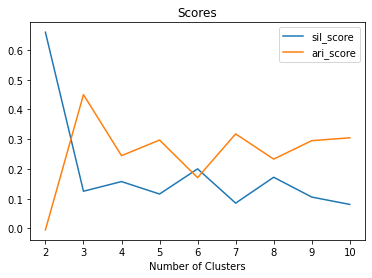

In [28]:
plt.plot(clusters,sil_score,label='sil_score')
plt.plot(clusters,ari_score, label='ari_score')
plt.title("Scores")
plt.xlabel("Number of Clusters")
plt.legend()
plt.show()

Based on the Silhouette Score, k=2 is the optimum number of clusters. Interestingly, ARI score is really low when true label are compared to the predicted label when k=2 but higher when k=3.

### Model 2: KMeans with PCA Data
Model 2 uses PCA applied data to compare how the KMeans will distinguish between scaled data applied data.

In [29]:
kmeans_mod2=kmeans(pca_data, 2)

1    4567
0      34
dtype: int64


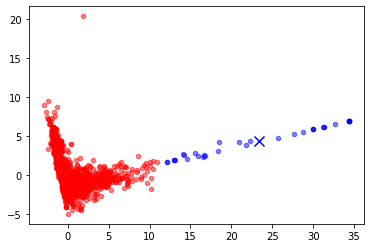

In [30]:
display_cluster(pca_data, kmeans_mod2, 2)

In [31]:
scores(pca_data, kmeans_mod2, true_label, "Model 2")

Model 2  Silhouette Score: 0.6662630210357114
Model 2  ARI Score: -0.00494969888751088


Similar to model 1, silhouette score is high but ari is low. However, visual seperation of the clusters looks better. 

### Model 3: KMeans with UMAP data
Model 3 applies UMAP data to the same algorithm as model 2. UMAP is used to cath nonlinear relatinships between variables. 

In [32]:
kmeans_mod3=kmeans(umap_data, 2)

1    4197
0     404
dtype: int64


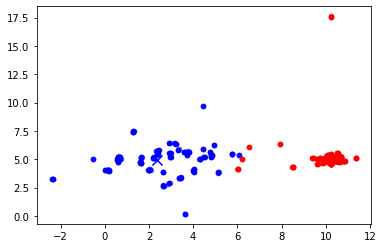

In [33]:
display_cluster(umap_data, kmeans_mod3, 2)

In [34]:
scores(umap_data, kmeans_mod3, true_label, "Model 3")

Model 3  Silhouette Score: 0.50171214
Model 3  ARI Score: 0.00996330705308285


Silhouette score decrease by ARI increased, meaning that more predicted labels were identified when compared to true labels. Visual shows that grouping of clusters improved as well. 

### Model 4: Hierarchical Clustering with PCA DATA

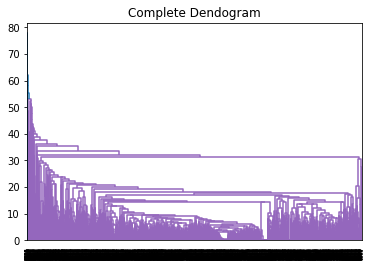

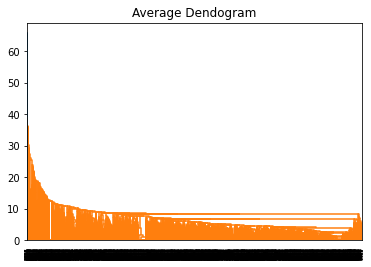

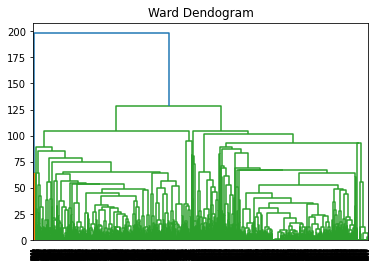

In [35]:
#Apply Hierarchical Clustering
#Primarily lets use dendogram to visualize our data and to choose our linkage

#Creating Dendograms
plt.title("Complete Dendogram")
dendrogram(linkage(X_scaled, method='complete'))
plt.show()

plt.title("Average Dendogram")
dendrogram(linkage(X_scaled, method='average'))
plt.show()

plt.title("Ward Dendogram")
dendrogram(linkage(X_scaled, method='ward'))
plt.show()

Based on the dendograms of hierachical clustering, ward linkage is better at seperating clusters and will be used for further modeling.

In [36]:
agg_model4=hierarchical(pca_data, 2, 'ward')

0    4568
1      33
dtype: int64


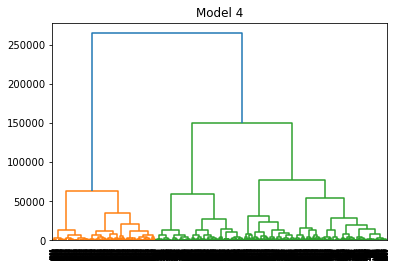

In [37]:
#Plot
plt.title("Model 4")
dendrogram(linkage(agg_model4.children_, method='ward'))
plt.show()

In [38]:
scores(pca_data, agg_model4, true_label, "Model 4")

Model 4  Silhouette Score: 0.6668876899287017
Model 4  ARI Score: -0.004810540396605019


Silhouette is high but ARI is low. Number of labels were not predicted correclty. 

### Model 5: Hierarchical Clustering with UMAP Data

In [39]:
agg_model5=hierarchical(umap_data, 2, 'ward')

0    4166
1     435
dtype: int64


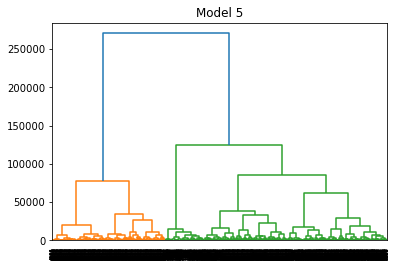

In [40]:
plt.title("Model 5")
dendrogram(linkage(agg_model5.children_, method='ward'))
plt.show()

In [41]:
scores(umap_data, agg_model5, true_label, "Model 5")

Model 5  Silhouette Score: 0.4916757
Model 5  ARI Score: 0.009014815295568817


Silhouette decreased but ARI scores improved compared to previous model. Model was able to predict more labels.

### Results: Model Comparison

In [42]:
index=pd.Index(["Silhouette Score","ARI Score"])
result=pd.concat([Silhouette_Scores,ARI_Scores]).set_index(index).T

In [43]:
result

,Silhouette Score,ARI Score
Model 1,0.659631,-0.004950
Model 2,0.666263,-0.004950
Model 3,0.501712,0.009963
Model 4,0.666888,-0.004811
Model 5,0.491676,0.009015


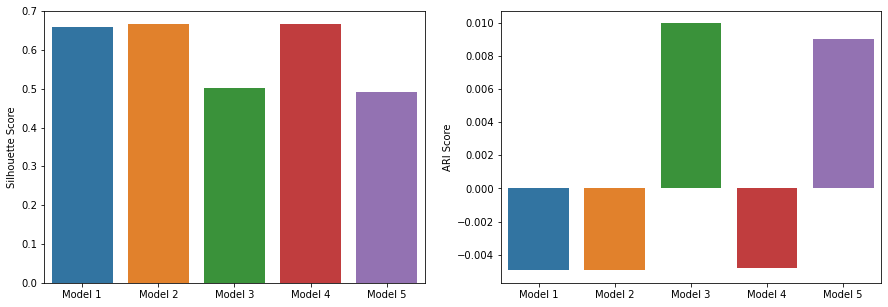

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=result, x=list(result.index), y=result['Silhouette Score'])
plt.subplot(1,2,2)
sns.barplot(data=result, x=list(result.index), y=result['ARI Score'])
plt.show()

#### Model Performance and Insights
    - All 5 models were set to distinguish two clusters, spam and non-spam emails. Each of those models were able to identify a number of spam emails but two were better and comparabable in performance. Model 3 and 5 were able to identify more than 400 spam emails. Between those two, model 3 is superior based on higher ARI score of 0.0099, even though its silhouette score of 0.50 is much lower than silhouette score's of model 1, 2, and 3. However, performance of model 3 is not sufficient for deployment.

    - The total spam emails found from 4600 samples accounted for 39.4%. By analyzing the frequency of the words used, it is very clear that words as "you, your, free, and our" are a major contributer to an email being spam or not.


#### Recommendation:
    - Models performance is not enough for deployment. Model needs to be revisited in the future and worked on finding the the best hyperparameters with addition of more data. Other types of clustering algorithms as Guassian Mixture model and DBSCAN, can be attempted.  